In [1]:
import matplotlib.collections
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec
from matplotlib import rc

rc('animation', html='html5')

def setup_axes(n):
    fig,ax = plt.subplots()
    fig.set_facecolor("black")
    ax.set_facecolor("black")
    ax.set_xlim(-1, n+1)
    ax.set_ylim(-1, n+1)
    ax.set_xticks(list(range(n + 1)))
    ax.set_yticks(list(range(n + 1)))
    ax.set_aspect("equal")
    return fig,ax

In [2]:
def setup_grid_graph(n):
    
    #set up neighbour graph
    MOVES = [(1,0),(1,1),(0,1),(-1,0),(1,-1),(-1,1),(0,1),(-1,-1)]
    xx, yy = np.meshgrid(list(range(n)), list(range(n)))
    locations = np.vstack((xx.reshape(-1), yy.reshape(-1)))
    grid_map = {(x,y):set() for x,y in zip(locations[0], locations[1])}

    height = n
    width = n
    
    #find neighbours for every cell
    for i in range(height):
        for j in range(width):
            neighbours = 0
            for di,dj in MOVES:
                ni,nj = i+di,j+dj
                if (ni<0 or ni>=height) or (nj<0 or nj>=width):
                    continue
                grid_map[(i,j)].add((ni,nj))

    return grid_map

#change grid state for each
def update_grid(grid_map,dead_or_alive):
    to_die = []
    to_live = []
    for cell in grid_map:
        #apply game rules
        live_neighbours = 0
        for neighbour in grid_map[cell]:
            if dead_or_alive[neighbour]:
                live_neighbours += 1
        if dead_or_alive[cell]:
            if (live_neighbours<2) or (live_neighbours>3):
                to_die.append(cell)
        else:
            if live_neighbours == 3:
                to_live.append(cell)

    for cell in to_live:
        dead_or_alive[cell] = True
    for cell in to_die:
        dead_or_alive[cell] = False

In [3]:
def animate(i,dead_or_alive):
    while ax.patches:
        ax.patches.pop()
    num_alive = 0
    for cell in dead_or_alive:
        if dead_or_alive[cell]:
            rect = matplotlib.patches.Rectangle((cell[0],cell[1]),1,1,color = 'white')
            ax.add_patch(rect)
            num_alive+= 1
    update_grid(grid_map, dead_or_alive)

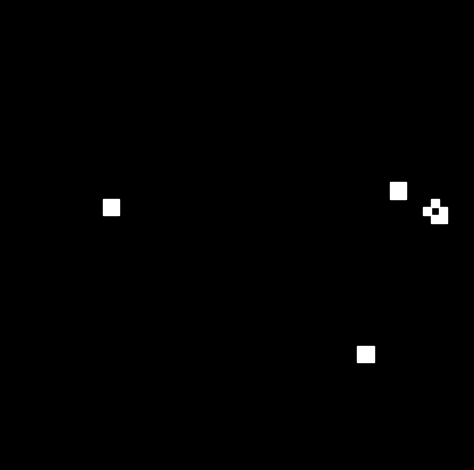

In [6]:
n = 50
grid_map = setup_grid_graph(n)

#dict to keep track of living cells
dead_or_alive = {x:False for x in grid_map}
for i in range(int(n**2)):
    dead_or_alive[np.random.randint(0,n),np.random.randint(0,n)] = True

fig,ax = setup_axes(n)
fig.tight_layout()
#might take a while
ani = FuncAnimation(fig,animate,interval=100,frames = 50,fargs=(dead_or_alive,))

ani